<a href="https://colab.research.google.com/github/AshrayGattani/exploratory_data_analysis/blob/main/Insurance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/AshrayGattani/exploratory_data_analysis

Cloning into 'exploratory_data_analysis'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 180 (delta 37), reused 53 (delta 26), pack-reused 101
Receiving objects: 100% (180/180), 93.48 MiB | 35.47 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
import pandas as pd

In [5]:
df =  pd.read_csv("/content/exploratory_data_analysis/data/insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df.dtypes #types of data

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [51]:
print("Unique value count:")
cols = df.columns.tolist()
for col in cols:
    print(col + " = " + str(len(df[col].unique())))

Unique value count:
age = 47
sex = 2
bmi = 548
children = 6
smoker = 2
region = 4
charges = 1337


In [53]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [56]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [57]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [58]:
df.mad() #  mean average deviation

age           12.248931
bmi            4.897871
children       0.985405
charges     9091.126581
dtype: float64

In [60]:
# looking at all all categorical variables

print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [62]:
# looking at all numerical variables

print(df['age'].value_counts(bins=5))
print(df['bmi'].value_counts(bins=5))
print(df['children'].value_counts(bins=5))
print(df['charges'].value_counts(bins=5))

(17.953, 27.2]    362
(45.6, 54.8]      258
(54.8, 64.0]      242
(36.4, 45.6]      239
(27.2, 36.4]      237
Name: age, dtype: int64
(23.394, 30.828]    553
(30.828, 38.262]    483
(15.922, 23.394]    157
(38.262, 45.696]    128
(45.696, 53.13]      17
Name: bmi, dtype: int64
(-0.006, 1.0]    898
(1.0, 2.0]       240
(2.0, 3.0]       157
(3.0, 4.0]        25
(4.0, 5.0]        18
Name: children, dtype: int64
(1059.224, 13651.585]     934
(13651.585, 26181.296]    215
(26181.296, 38711.006]     94
(38711.006, 51240.717]     89
(51240.717, 63770.428]      6
Name: charges, dtype: int64


In [63]:
#create another column showing bmi stats 
bmi_conditions = [
    (df['bmi'] < 18.5),
    (df['bmi'] >= 18.5) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30) & (df['bmi'] < 35),
    (df['bmi'] >=35)
    ]
bmi_values = ['underweight', 'normal', 'overweight', 'obese', 'extremely obese']

df['bmi_stats'] = np.select(bmi_conditions, bmi_values)

df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_stats
1248,18,female,39.82,0,no,southeast,1633.96180,extremely obese
482,18,female,31.35,0,no,southeast,1622.18850,obese
492,18,female,25.08,0,no,northeast,2196.47320,overweight
525,18,female,33.88,0,no,southeast,11482.63485,obese
529,18,male,25.46,0,no,northeast,1708.00140,overweight


In [64]:
age_conditions = [
    (df['age'] < 20),
    (df['age'] >= 20) & (df['age'] < 30),
    (df['age'] >= 30) & (df['age'] < 40),
    (df['age'] >= 40) & (df['age'] < 50),
    (df['age'] >= 50) & (df['age'] < 60),
    (df['age'] >= 60),
    ]

age_values = ['below 20', '20-30', '30-40', '40-50', '50-60','above 60']

df['age_stats'] = np.select(age_conditions, age_values)

df.tail()

,age,sex,bmi,children,smoker,region,charges,bmi_stats,age_stats
398,64,male,25.600,2,no,southwest,14988.43200,overweight,above 60
335,64,male,34.500,0,no,southwest,13822.80300,obese,above 60
378,64,female,30.115,3,no,northwest,16455.70785,obese,above 60
1265,64,male,23.760,0,yes,southeast,26926.51440,normal,above 60
635,64,male,38.190,0,no,northeast,14410.93210,extremely obese,above 60


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of Children')]

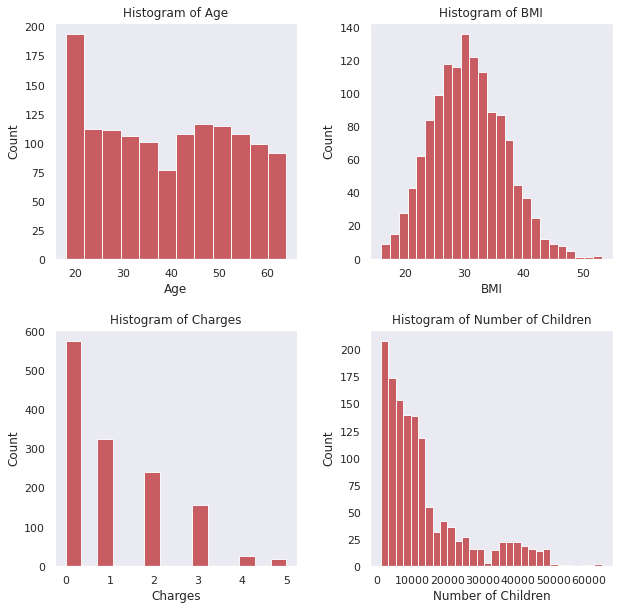

In [66]:
#To get a more visual representation of the numerical data, let's create a histogram of all columns
hist = df.hist(bins='auto',figsize=(10,10),layout=(2,2),grid=False,alpha=0.9, density=False, color='r')

hist[0,0].set_title('Histogram of Age')
hist[0,0].set(xlabel='Age',ylabel='Count')
hist[0,1].set_title('Histogram of BMI')
hist[0,1].set(xlabel='BMI',ylabel='Count')
hist[1,0].set_title('Histogram of Charges')
hist[1,0].set(xlabel='Charges',ylabel='Count')
hist[1,1].set_title('Histogram of Number of Children')
hist[1,1].set(xlabel='Number of Children',ylabel='Count')

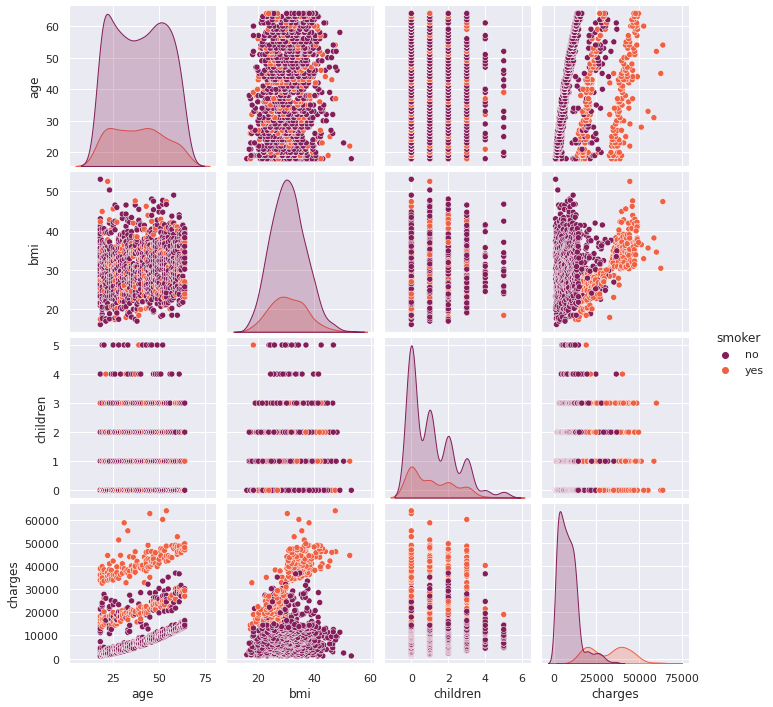

In [67]:
sns.pairplot(df, palette="rocket",hue="smoker")
plt.show()

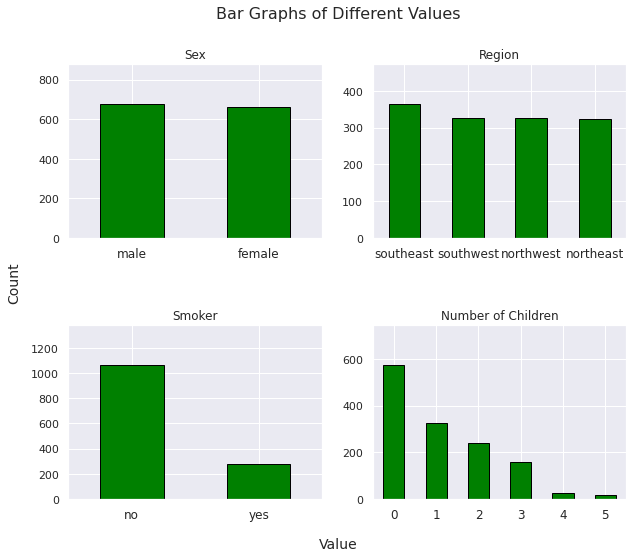

In [69]:
fig = plt.figure(figsize=(10,8))
fig.suptitle("Bar Graphs of Different Values", fontsize=16)

fig.text(0.5, 0.04, 'Value', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',fontsize=14)

plt.subplot(221)
ax1=df.sex.value_counts(ascending=False).plot(kind='bar',color='green',edgecolor='black',width=0.5)
ax1.margins(0.3) #zooms out graph
plt.title("Sex", fontsize=12)
plt.xticks(rotation='horizontal', fontsize=12)

plt.subplot(222)
ax2=df.region.value_counts(ascending=False).plot(kind='bar',color='green',edgecolor='black')
ax2.margins(0.3) #zooms out graph
plt.title("Region", fontsize=12)
plt.xticks(rotation='horizontal', fontsize=12)

plt.subplot(223)
ax3=df.smoker.value_counts(ascending=False).plot(kind='bar',color='green',edgecolor='black')
ax3.margins(0.3) #zooms out graph
plt.title("Smoker", fontsize=12)
plt.xticks(rotation='horizontal', fontsize=12)

plt.subplot(224)
ax4=df.children.value_counts(ascending=False).plot(kind='bar',color='green',edgecolor='black')
ax4.margins(0.3) #zooms out graph
plt.title("Number of Children", fontsize=12)
plt.xticks(rotation='horizontal', fontsize=12)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

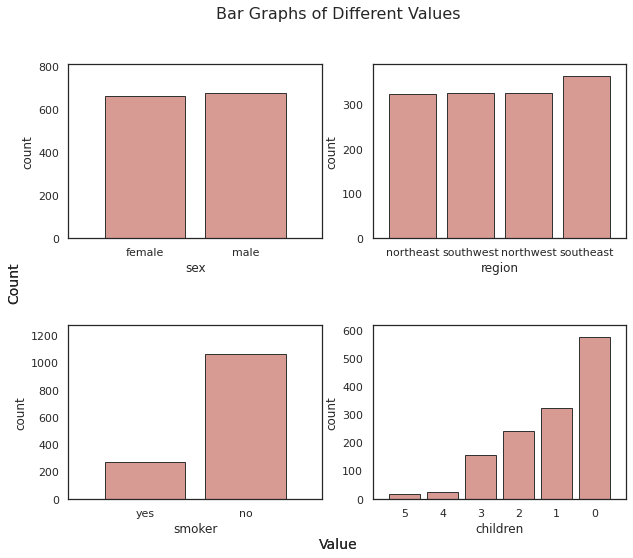

In [71]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots(2,2)
fig.suptitle("Bar Graphs of Different Values", fontsize=16)
fig.text(0.5, 0.04, 'Value', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',fontsize=14)

sax1=sns.countplot(data=df, x="sex", order=df['sex'].value_counts(ascending=True).index, color="salmon", saturation=.5, edgecolor=".2", ax=ax[0][0])
sax1.margins(0.2)
sax2=sns.countplot(data=df, x="region", order=df['region'].value_counts(ascending=True).index, color="salmon", saturation=.5, edgecolor=".2", ax=ax[0][1])
sax2.margins(0.075)
sax3=sns.countplot(data=df, x="smoker", order=df['smoker'].value_counts(ascending=True).index, color="salmon", saturation=.5, edgecolor=".2", ax=ax[1][0])
sax3.margins(0.2)
sax4=sns.countplot(data=df, x="children", order=df['children'].value_counts(ascending=True).index, color="salmon", saturation=.5, edgecolor=".2", ax=ax[1][1])
sax4.margins(0.075)

fig.suptitle("Bar Graphs of Different Values", fontsize=16)
fig.text(0.5, 0.04, 'Value', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

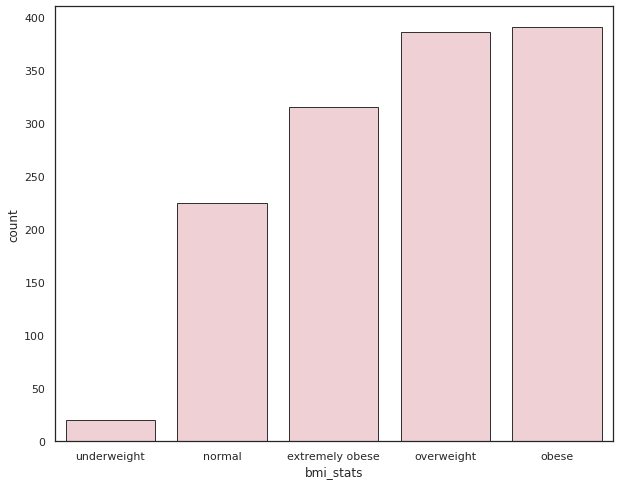

In [75]:
sns.countplot(data=df, x="bmi_stats", order=df['bmi_stats'].value_counts(ascending=True).index, color="pink", saturation=.5, edgecolor="0.2")

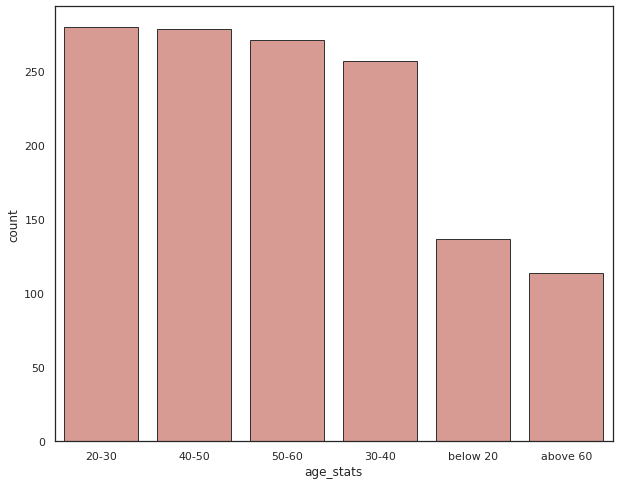

In [77]:
sns.countplot(data=df, x="age_stats", order=df['age_stats'].value_counts().index, color="salmon", saturation=.5, edgecolor=".2")

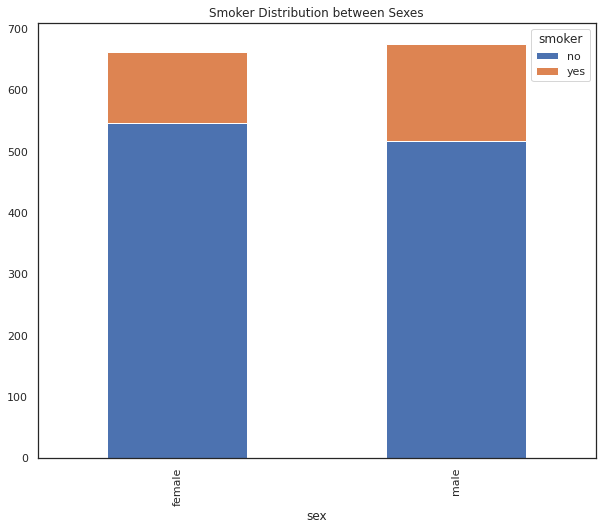

In [78]:
#What is the smoker distribution among sexes?
df.groupby(['sex','smoker']).size().unstack().plot(kind='bar',stacked=True,title="Smoker Distribution between Sexes")

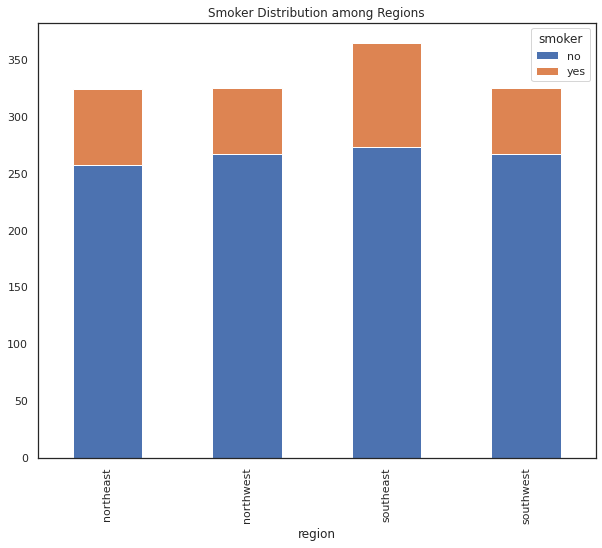

In [80]:
# What is the smoker distribution among regions?
df.groupby(['region','smoker']).size().unstack().plot(kind='bar',stacked=True,title="Smoker Distribution among Regions")

Text(0, 0.5, '')

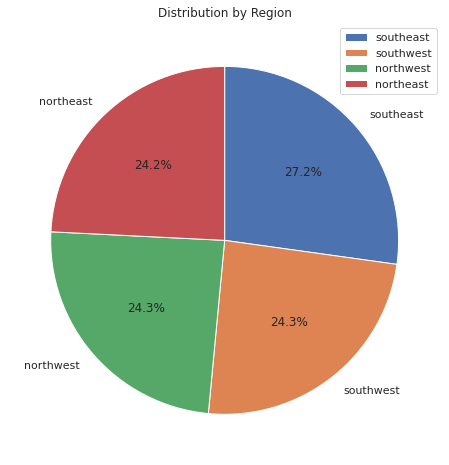

In [81]:
# Creating a pie chart to see distribution of people per region
pie = df['region'].value_counts().plot(kind="pie",counterclock=False,title='Distribution by Region',autopct='%1.1f%%', startangle=90)
plt.legend(loc='upper right')
pie.set_ylabel('')

Text(0, 0.5, '')

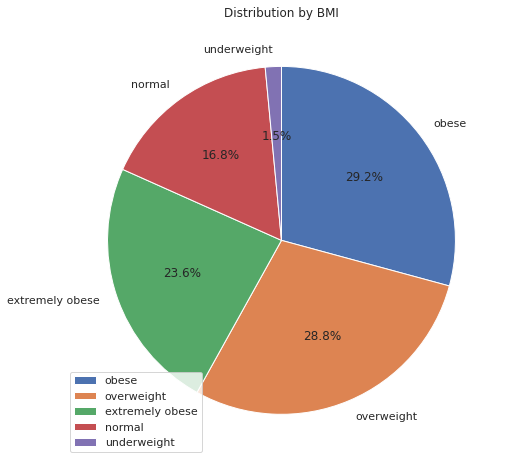

In [82]:
# pie chart for bmi categories
pie = df['bmi_stats'].value_counts().plot(kind="pie",counterclock=False,title='Distribution by BMI',autopct='%1.1f%%', startangle=90)
plt.legend(loc='lower left')
pie.set_ylabel('')

Text(0, 0.5, '')

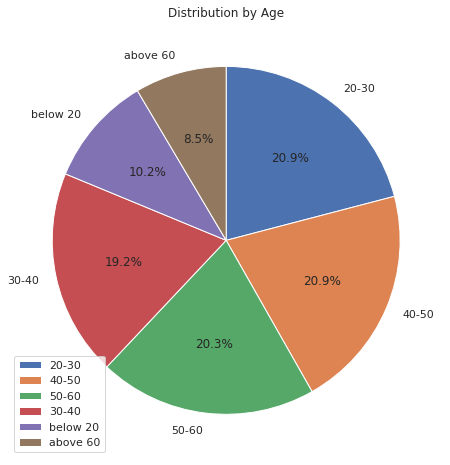

In [83]:
# pie chart for age categories
pie = df['age_stats'].value_counts().plot(kind="pie",counterclock=False,title='Distribution by Age',autopct='%1.1f%%', startangle=90)
plt.legend(loc='lower left')
pie.set_ylabel('')

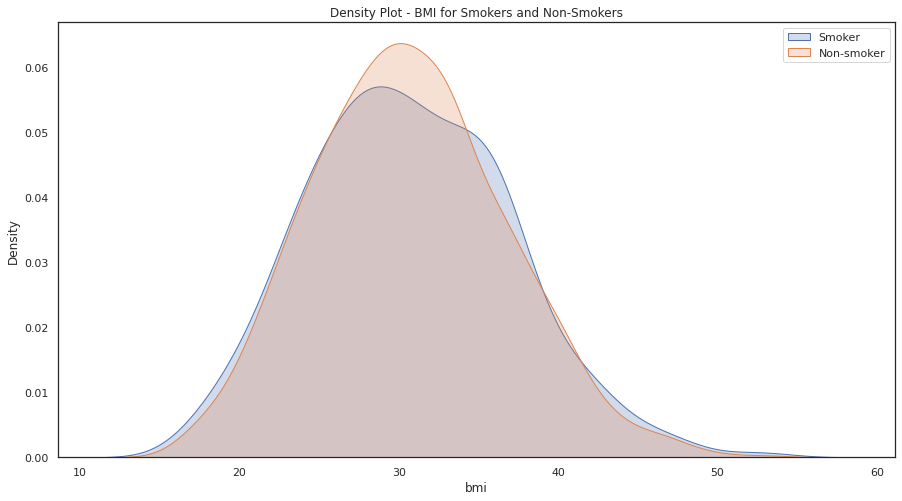

In [84]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["bmi"][df.smoker == 'yes'], shade=True)
sns.kdeplot(df["bmi"][df.smoker == 'no'], shade=True)
plt.legend(['Smoker', 'Non-smoker'])
plt.title('Density Plot - BMI for Smokers and Non-Smokers')
plt.show()

In [8]:
df.sort_values(by=['age'], inplace=True)  # sorting acc to age ascending 
display(df)

,age,sex,bmi,children,smoker,region,charges
1248,18,female,39.820,0,no,southeast,1633.96180
482,18,female,31.350,0,no,southeast,1622.18850
492,18,female,25.080,0,no,northeast,2196.47320
525,18,female,33.880,0,no,southeast,11482.63485
529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
398,64,male,25.600,2,no,southwest,14988.43200
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785
1265,64,male,23.760,0,yes,southeast,26926.51440


In [9]:
df['sex'].value_counts(ascending=True) #counts number of female and male 

female    662
male      676
Name: sex, dtype: int64

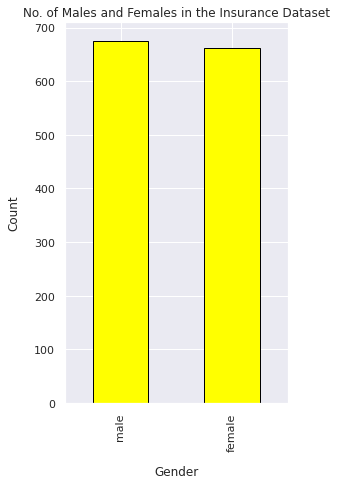

In [14]:
sns.set(font_scale=1)
barplot1 = df['sex'].value_counts(ascending=False).plot(kind='bar', figsize=(4,7), color='yellow', edgecolor = 'black')
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title('No. of Males and Females in the Insurance Dataset', y=1)
plt.show()

In [16]:
df['smoker'].value_counts(ascending=True)   # no. of smokers

yes     274
no     1064
Name: smoker, dtype: int64

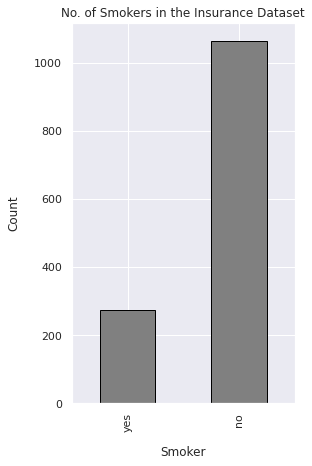

In [21]:
sns.set(font_scale=1)
barplot2 = df['smoker'].value_counts(ascending=True).plot(kind='bar', figsize=(4,7), color='grey', edgecolor = 'black')
plt.xlabel("Smoker", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title('No. of Smokers in the Insurance Dataset', y=1)
plt.show()

In [22]:
df['region'].value_counts(ascending=True)

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

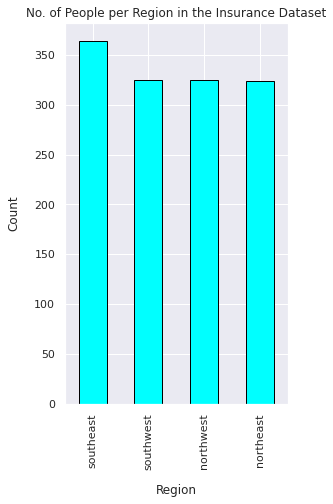

In [24]:
sns.set(font_scale=1)
barplot3 = df['region'].value_counts(ascending=False).plot(kind='bar', figsize=(4,7), color='cyan', edgecolor = 'black')
plt.xlabel("Region", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title('No. of People per Region in the Insurance Dataset', y=1)
plt.show()

In [29]:
df['children'].value_counts(ascending=False)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

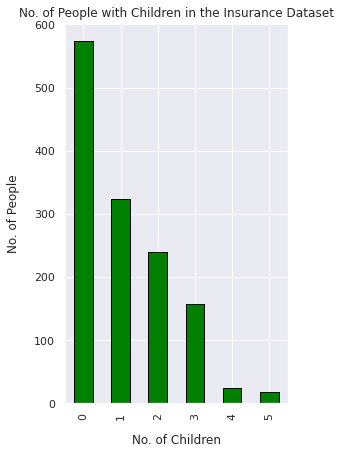

In [32]:
sns.set(font_scale=1)
barplot4 = df['children'].value_counts(ascending=False).plot(kind='bar', figsize=(4,7), color='green', edgecolor = 'black')
plt.xlabel("No. of Children", labelpad=14)
plt.ylabel("No. of People", labelpad=14)
plt.title('No. of People with Children in the Insurance Dataset', y=1)
plt.show()

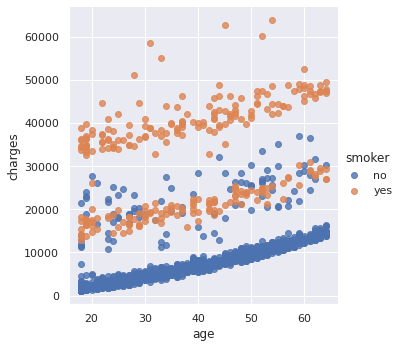

In [33]:
vis4 = sns.lmplot(data=df, x = "age" , y ="charges", fit_reg = False , hue = "smoker")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


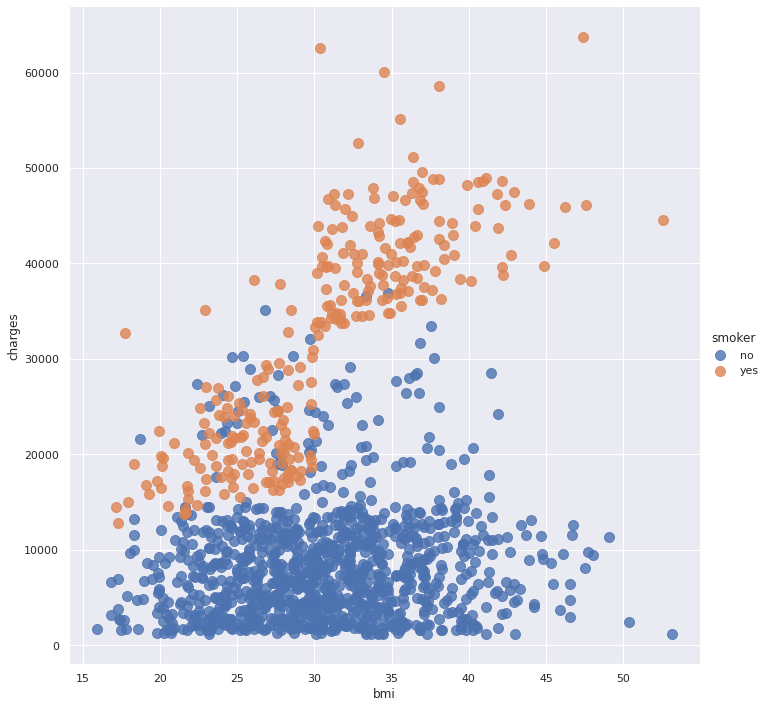

In [34]:
vis3 = sns.lmplot(data=df, x = "bmi" , y ="charges", fit_reg = False , hue = "smoker",  size= 10, aspect = 1, scatter_kws = {"s" :100})
plt.show()

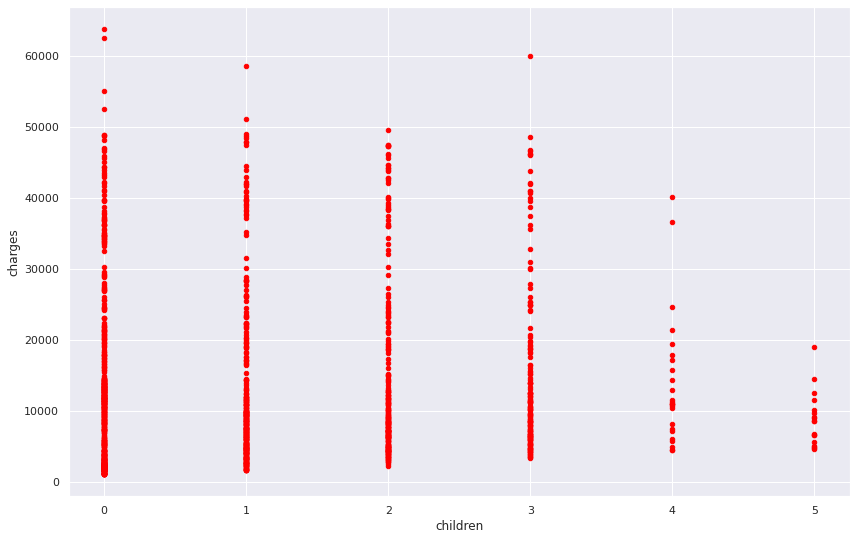

In [49]:
df.plot(kind='scatter',x='children',y='charges',color='red')
plt.show()

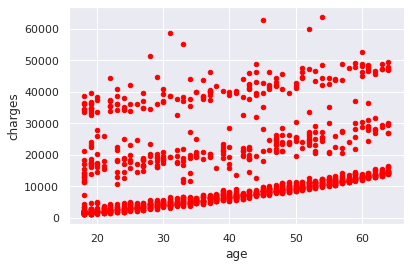

In [37]:
df.plot(kind='scatter',x='age',y='charges',color='red')
plt.show()

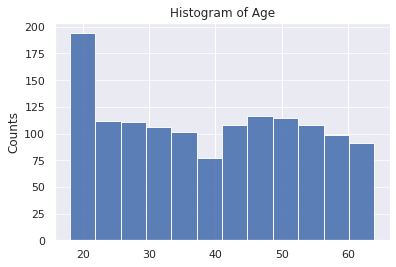

In [38]:
df['age'].hist(bins='auto', alpha=0.9)
plt.title('Histogram of Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()

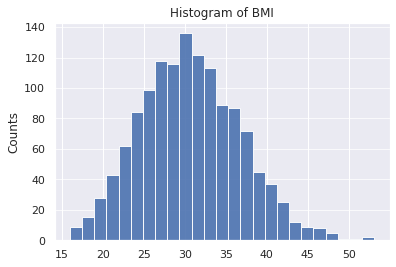

In [40]:
df['bmi'].hist(bins='auto', alpha=0.9)
plt.title('Histogram of BMI')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


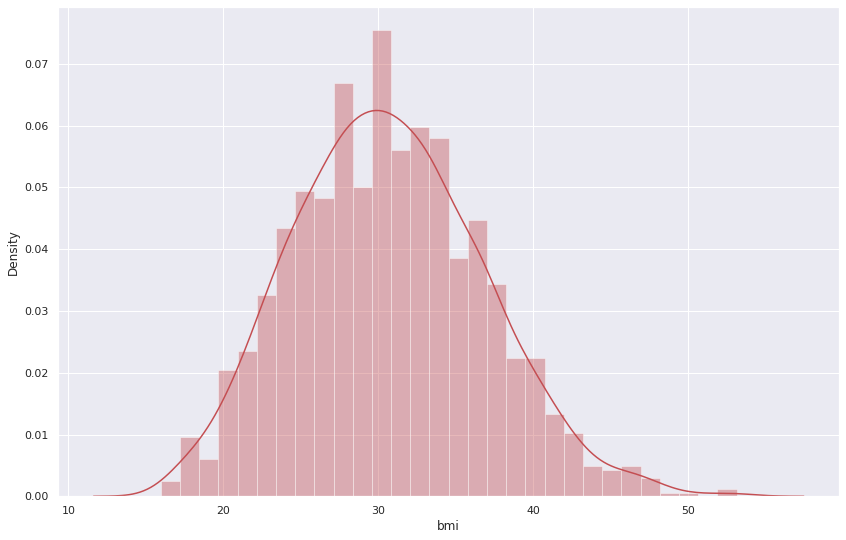

In [41]:
plt.rcParams["figure.figsize"]=14,9
vis1=sns.distplot(df["bmi"],bins=30,color='r')

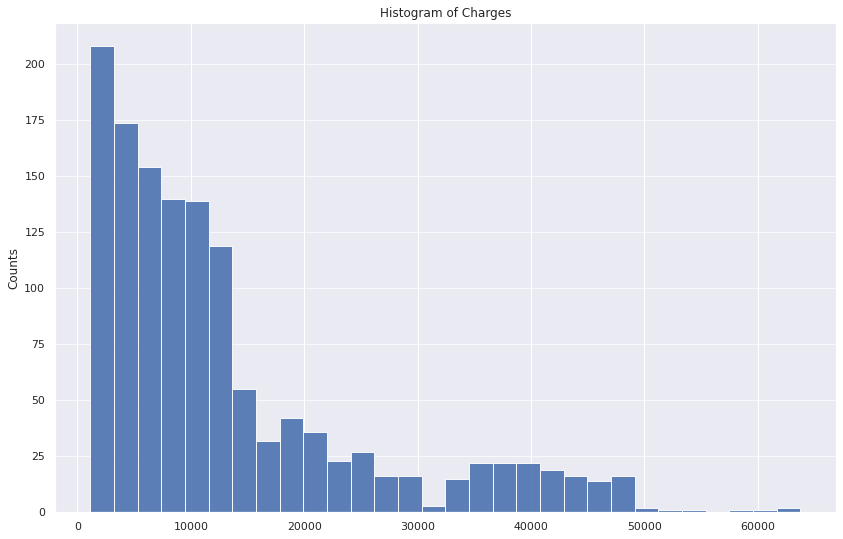

In [44]:
df['charges'].hist(bins='auto', alpha=0.9)
plt.title('Histogram of Charges')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()

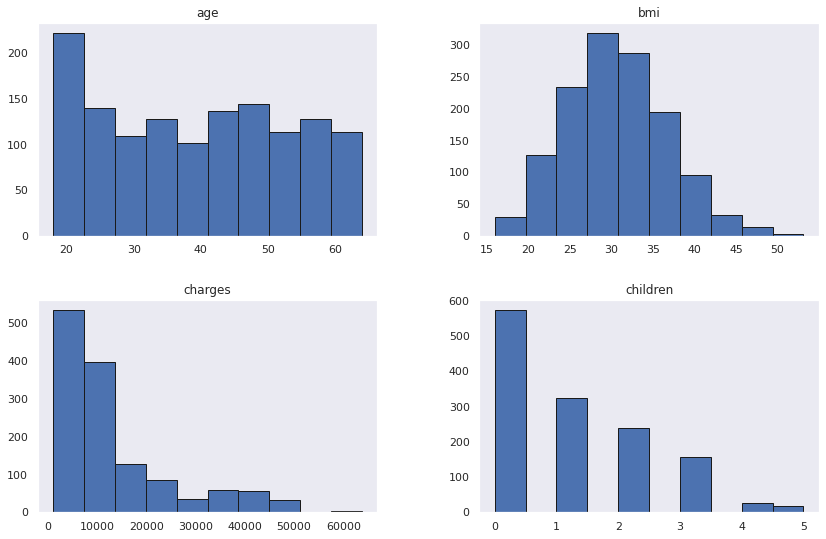

In [43]:
df[['age','bmi','charges','children']].hist(figsize=(14, 9),bins=10,linewidth='1',edgecolor='k',grid=False)
plt.show()

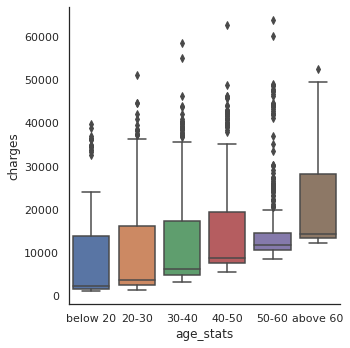

In [85]:
sns.catplot(data=df, y='charges',x='age_stats', kind='box')

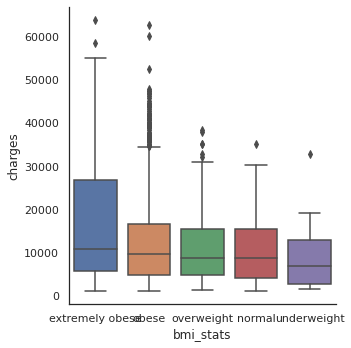

In [86]:
sns.catplot(data=df, y='charges',x='bmi_stats', kind='box')

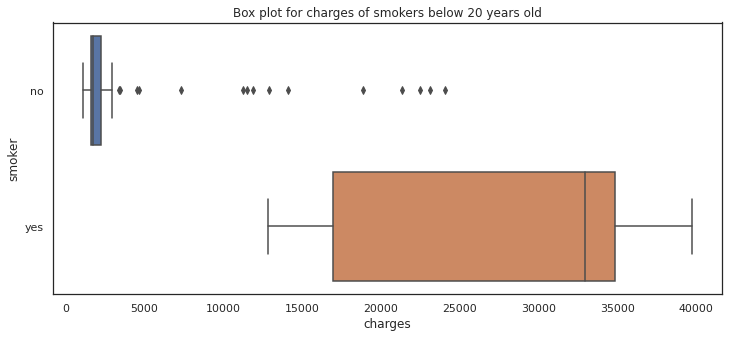

In [89]:
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers below 20 years old")
sns.boxplot(y="smoker", x="charges", data = df[(df.age < 20)] , orient="h")


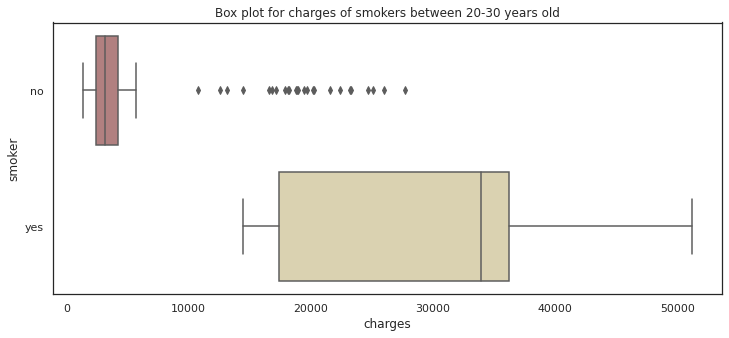

In [91]:
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers between 20-30 years old")
sns.boxplot(y="smoker", x="charges", data = df[(df.age_stats == '20-30')] , orient="h", palette = 'pink')

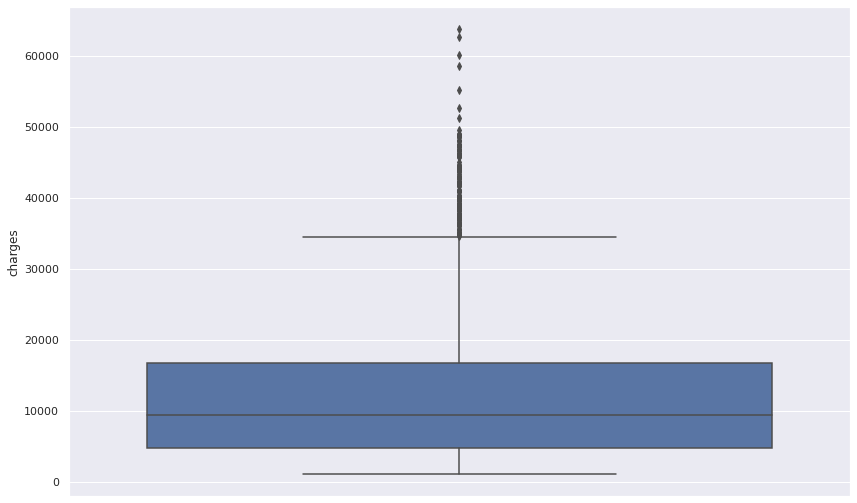

In [46]:
vis2=sns.boxplot(data=df, y='charges')  # some outliers 

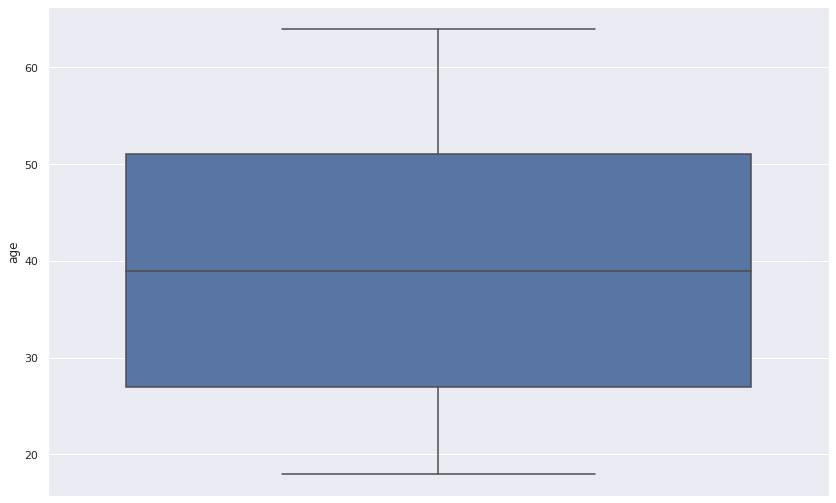

In [47]:
vis2=sns.boxplot(data=df, y='age')

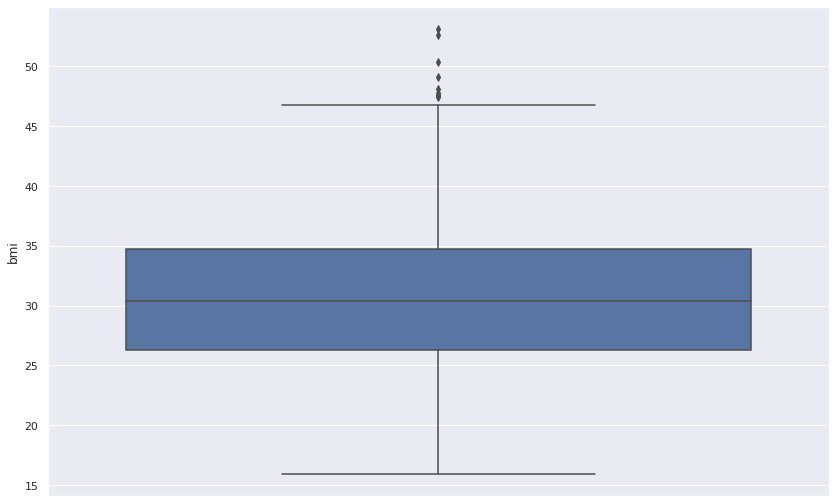

In [48]:
vis2=sns.boxplot(data=df, y='bmi')

In [93]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [95]:
# Convert strings to onehot encoding
onehot_df = pd.get_dummies(df)
onehot_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,bmi_stats_normal,bmi_stats_obese,bmi_stats_overweight,bmi_stats_underweight,age_stats_20-30,age_stats_30-40,age_stats_40-50,age_stats_50-60,age_stats_above 60,age_stats_below 20
1248,18,39.82,0,1633.96180,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,18,31.35,0,1622.18850,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
492,18,25.08,0,2196.47320,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
525,18,33.88,0,11482.63485,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
529,18,25.46,0,1708.00140,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [96]:
#correlations
corr=onehot_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_stats_extremely obese,bmi_stats_normal,bmi_stats_obese,bmi_stats_overweight,bmi_stats_underweight,age_stats_20-30,age_stats_30-40,age_stats_40-50,age_stats_50-60,age_stats_above 60,age_stats_below 20
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.092286,-0.079191,0.007846,-0.012910,-0.060142,-0.539879,-0.166183,0.196123,0.542999,0.494898,-0.498047
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205,0.750169,-0.593545,0.176657,-0.319722,-0.264664,-0.073963,-0.017562,0.003894,0.070008,0.067732,-0.038335
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914,-0.018975,0.012675,0.028485,-0.020039,-0.004592,-0.054243,0.164693,0.136665,-0.018091,-0.126229,-0.184131
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210,0.169194,-0.106265,0.061002,-0.120083,-0.044960,-0.157606,-0.061692,0.047861,0.134253,0.201118,-0.135680
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184,-0.032896,0.022690,-0.021215,0.026460,0.025927,-0.012991,-0.000590,0.003531,0.010853,0.008548,-0.008793
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184,0.032896,-0.022690,0.021215,-0.026460,-0.025927,0.012991,0.000590,-0.003531,-0.010853,-0.008548,0.008793
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945,-0.027421,-0.019430,0.024720,0.020629,-0.013803,0.006098,-0.025250,-0.022181,0.066804,-0.024245,-0.011880
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.027421,0.019430,-0.024720,-0.020629,0.013803,-0.006098,0.025250,0.022181,-0.066804,0.024245,0.011880
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177,-0.096613,0.086371,-0.017960,0.017441,0.074146,0.005135,-0.005462,0.001887,0.005976,-0.003783,-0.006761
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.138515,0.038898,0.038422,0.050934,0.030765,-0.000051,0.002543,-0.007589,0.000755,0.001932,0.004155


**IT IS OBVIOUS THAT BEING A SMOKER IS HIGHLY RELATED TO INSURANCE CHARGES**

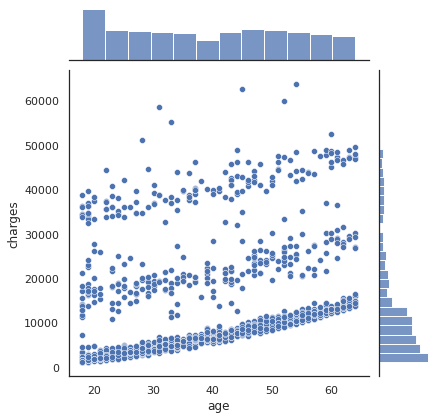

In [97]:
sns.jointplot(data=df,x="age",y="charges")